In [2]:
# import Libarary 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
titanic = sns.load_dataset('titanic')

In [4]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [6]:
# count the numbers of rows and columns
titanic.shape

(891, 15)

In [9]:
#Get stat
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#count the number of survivors
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

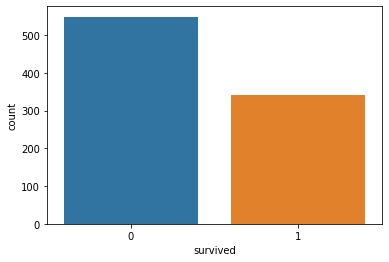

In [11]:
#visualize the count of survivors
sns.countplot(titanic['survived'])

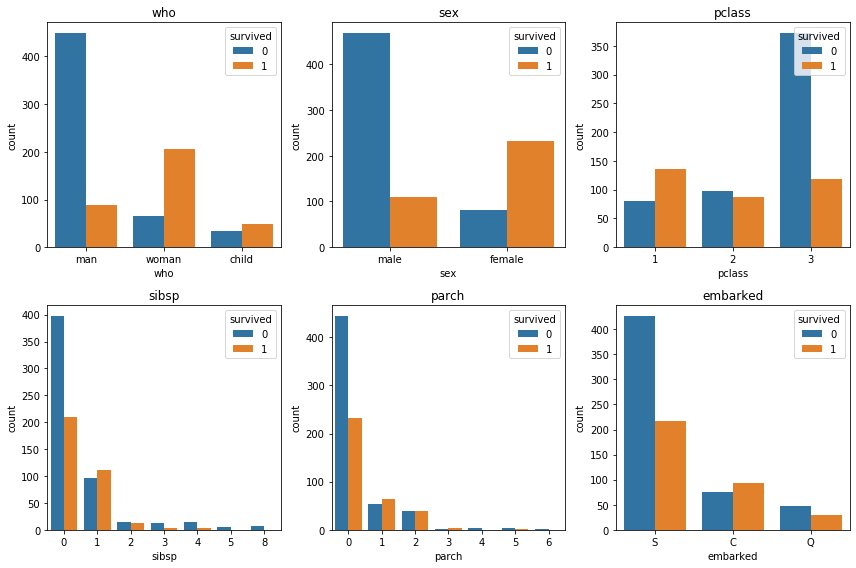

In [23]:
#visualize the count for columns 'who' 'sex' 'sibsp' 'pclass''parch' 'embarked'
cols = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']

n_rows = 2
n_cols = 3

#the subplot grid and figure size
fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols *4, n_rows*4))
  
for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c #index to go through the number of columns 
        ax = axs[r][c] #show there to position each sub plot
        sns.countplot(titanic[cols[i]], hue = titanic['survived'], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title = 'survived', loc = 'upper right')
        
plt.tight_layout()

In [26]:
#Look at survive rate by sex
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [27]:
#SURVIVAL RATE BY SEX AND CLASS
titanic.pivot_table('survived',index='sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


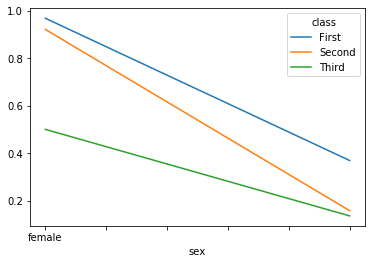

In [28]:
#SURVIVAL RATE BY SEX AND CLASS
titanic.pivot_table('survived',index='sex',columns='class').plot()

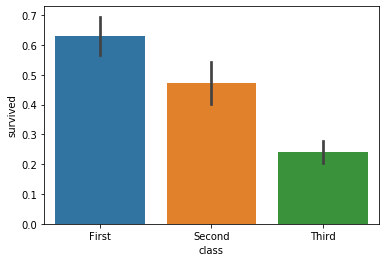

In [30]:
#plot the survial rate of each class
sns.barplot(x='class',y='survived',data=titanic)

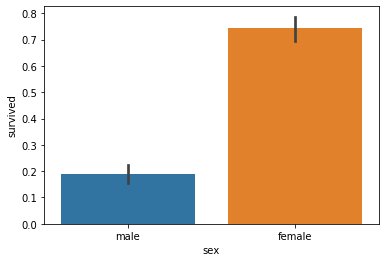

In [31]:
#plot the survial rate of each class
sns.barplot(x='sex',y='survived',data=titanic)

In [71]:
age = pd.cut(titanic['age'],[0,18,30,50,80])
titanic.pivot_table('survived', ['sex',age],'class')

class            First    Second     Third
sex age                                   
0   (0, 18]   0.909091  1.000000  0.511628
    (18, 30]  0.958333  0.900000  0.500000
    (30, 50]  0.972222  0.925926  0.272727
    (50, 80]  1.000000  0.666667  1.000000
1   (0, 18]   0.800000  0.600000  0.215686
    (18, 30]  0.428571  0.027027  0.147541
    (30, 50]  0.448980  0.114286  0.126761
    (50, 80]  0.192308  0.083333  0.000000

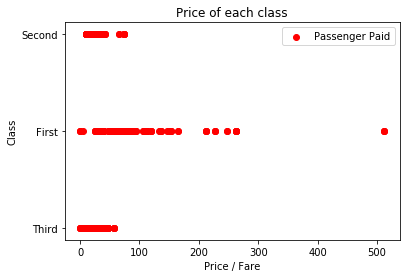

In [72]:
#plot the prices paid of each class
plt.scatter(titanic['fare'], titanic['class'], color='red',label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Price of each class')
plt.legend()
plt.show()

In [73]:
titanic.isnull().sum()  #check empyt values

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           530
embark_town      0
alive            0
alone            0
dtype: int64

In [74]:
#look at all the values in each column and get a count
for val in titanic:
    print(titanic[val].value_counts())
    print()

0    424
1    288
Name: survived, dtype: int64

3    355
1    184
2    173
Name: pclass, dtype: int64

1    453
0    259
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

0    469
1    183
2     25
4     18
3     12
5      5
Name: sibsp, dtype: int64

0    519
1    110
2     68
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

13.0000    41
26.0000    30
8.0500     29
10.5000    24
7.8958     23
           ..
9.4750      1
13.4167     1
61.3792     1
14.1083     1
8.0292      1
Name: fare, Length: 219, dtype: int64

S    554
C    130
Q     28
Name: embarked, dtype: int64

Third     355
First     184
Second    173
Name: class, dtype: int64

man      413
woman    216
child     83
Name: who, dtype: int64

True     413
False    299
Name: adult_male, dtype: int64

C    51
B    43
D    31
E    30
A    12
F    11
G     4
Name: deck, dtype

In [83]:
#Drop columns, get rid of redundant 
titanic = titanic.drop(['deck', 'embark_town', 'alive', 'class', 'who', 'alone', 'adult_male'], axis=1)

#Remove rows with na
titanic = titanic.dropna(subset = ['embarked','age'])

In [84]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
6,0,1,1,54.0,0,0,51.8625,2
7,0,3,1,2.0,3,1,21.0750,2
8,1,3,0,27.0,0,2,11.1333,2
9,1,2,0,14.0,1,0,30.0708,0
10,1,3,0,4.0,1,1,16.7000,2


In [77]:
titanic.shape

(712, 15)

In [78]:
titanic.dtypes

survived          int64
pclass            int64
sex               int64
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [79]:
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
['S' 'C' 'Q']


In [80]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Encode sex column
#titanic.iloc[:,2] = labelencoder.fit_transform( titanic.iloc[:,2].values)


#Encode embarked column
titanic.iloc[:,7] = labelencoder.fit_transform( titanic.iloc[:,7].values)

In [81]:
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


In [85]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [86]:
titanic.dtypes

survived      int64
pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
dtype: object

In [87]:
#Split the data into independent X and dependent Y
X = titanic.iloc[:,1:8].values
Y = titanic.iloc[:,0].values 

In [88]:
#Split the data set into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [89]:
#scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [108]:
#Create a function with ml models
def models(X_train, Y_train):
    
    #LogisticRegres
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    
    #KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
    knn.fit(X_train, Y_train)
    
    #SVC (liner)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state = 0)
    svc_lin.fit(X_train, Y_train)
    
    #SVC (RBF)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf',random_state = 0)
    svc_rbf.fit(X_train, Y_train)
    
    #GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    
    #DecisionTree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0 )
    tree.fit(X_train, Y_train)
    
    #RandomForest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0) 
    forest.fit(X_train, Y_train)
    
    #Print accuracy
    print('[0]Logistic Regression ', log.score(X_train, Y_train))
    print('[1]K Neighbors', knn.score(X_train, Y_train))
    print('[2]SVC liner', svc_lin.score(X_train, Y_train))
    print('[3]SVC RBF', svc_rbf.score(X_train, Y_train))
    print('[4]Gauss', gauss.score(X_train, Y_train))
    print('[5]Decision Tree', tree.score(X_train, Y_train))
    print('[6]Random Forest', forest.score(X_train, Y_train))
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest
    

In [109]:
model = models(X_train, Y_train)

[0]Logistic Regression  0.7978910369068541
[1]K Neighbors 0.8664323374340949
[2]SVC liner 0.7768014059753954
[3]SVC RBF 0.8506151142355008
[4]Gauss 0.8031634446397188
[5]Decision Tree 0.9929701230228472
[6]Random Forest 0.9753954305799648


In [114]:
#Show the confusion matrix and accuracy for all the test date
from sklearn.metrics import confusion_matrix

for i in range( len(model) ):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
    
    TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
    test_score = (TP+TN) / (TP+TN+FN+FP)
    print(cm)
    
    print('Model[{}] Accuracy = "{}"'.format(i, test_score) )
    print()

[[75  7]
 [19 42]]
Model[0] Accuracy = "0.8181818181818182"

[[67 15]
 [20 41]]
Model[1] Accuracy = "0.7552447552447552"

[[70 12]
 [18 43]]
Model[2] Accuracy = "0.7902097902097902"

[[75  7]
 [22 39]]
Model[3] Accuracy = "0.7972027972027972"

[[69 13]
 [27 34]]
Model[4] Accuracy = "0.7202797202797203"

[[54 28]
 [12 49]]
Model[5] Accuracy = "0.7202797202797203"

[[73  9]
 [14 47]]
Model[6] Accuracy = "0.8391608391608392"



In [144]:
#Get important features

forest = model[6]
importances = pd.DataFrame({'feature': titanic.iloc[:, 1:8].columns, 'importance': forest.feature_importances_})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances

,importance
feature,
age,0.299737
fare,0.295566
sex,0.183027
pclass,0.097562
sibsp,0.050443
parch,0.043887
embarked,0.029777


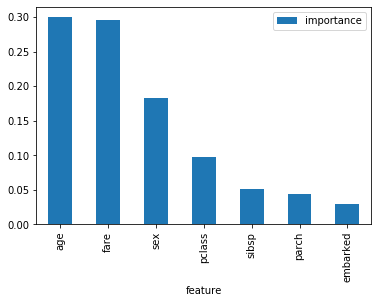

In [145]:
#visualize the important
importances.plot.bar()

In [146]:
#print the prediction of the random forest
pred = model[6].predict(X_test)
print(pred)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]


In [182]:
my_info = [[1,0,22,0,0,150,0]]

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()

# my_survival = sc.fit_transform(my_info)

pred = model[6].predict(my_info)

if pred == 0:
    print("died")
else:
    print("alive")

alive
